Alice's updated belief: 0.33
Bob's updated belief: 0.91


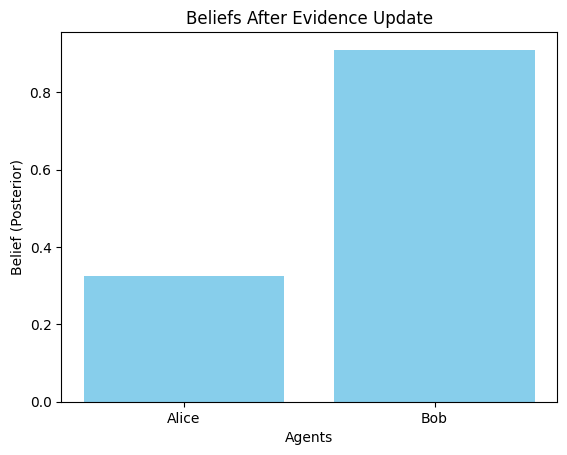

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class Agent:
    """Represents an agent with a belief system."""
    def __init__(self, name, prior, bias, update_rule="bayesian"):
        self.name = name
        self.prior = prior
        self.bias = bias
        self.update_rule = update_rule

    def update_belief(self, evidence):
        """Update the agent's belief based on evidence."""
        if self.update_rule == "bayesian":
            likelihood_safe = evidence["likelihood_safe"]
            likelihood_unsafe = evidence["likelihood_unsafe"]
            self.prior = (
                self.prior * likelihood_safe
                / (self.prior * likelihood_safe + (1 - self.prior) * likelihood_unsafe)
            )
        else:
            raise NotImplementedError("Only Bayesian updates are supported currently.")
        return self.prior


class Evidence:
    """Represents a piece of evidence."""
    def __init__(self, topic, polarity, credibility, likelihood_safe, likelihood_unsafe):
        self.topic = topic
        self.polarity = polarity
        self.credibility = credibility
        self.likelihood_safe = likelihood_safe
        self.likelihood_unsafe = likelihood_unsafe


class DSL:
    """Core domain-specific language for modeling belief systems."""
    def __init__(self):
        self.agents = []
        self.evidence_pool = []

    def add_agent(self, name, prior, bias, update_rule="bayesian"):
        agent = Agent(name, prior, bias, update_rule)
        self.agents.append(agent)
        return agent

    def add_evidence(self, topic, polarity, credibility, likelihood_safe, likelihood_unsafe):
        evidence = Evidence(topic, polarity, credibility, likelihood_safe, likelihood_unsafe)
        self.evidence_pool.append(evidence)
        return evidence

    def update_agents(self, evidence):
        for agent in self.agents:
            updated_belief = agent.update_belief({
                "likelihood_safe": evidence.likelihood_safe,
                "likelihood_unsafe": evidence.likelihood_unsafe
            })
            print(f"{agent.name}'s updated belief: {updated_belief:.2f}")

    def visualize_beliefs(self):
        beliefs = [agent.prior for agent in self.agents]
        names = [agent.name for agent in self.agents]
        plt.bar(names, beliefs, color='skyblue')
        plt.xlabel("Agents")
        plt.ylabel("Belief (Posterior)")
        plt.title("Beliefs After Evidence Update")
        plt.show()


# TEST
dsl = DSL()

# Define agents
alice = dsl.add_agent("Alice", prior=0.3, bias="skeptical")
bob = dsl.add_agent("Bob", prior=0.9, bias="supportive")

# Define evidence
fda_approval = dsl.add_evidence(
    topic="vaccine safety",
    polarity="positive",
    credibility=0.85,
    likelihood_safe=0.9,
    likelihood_unsafe=0.8
)

real_world_evidence = dsl.add_evidence(
    topic="vaccine safety",
    polarity="positive",
    credibility=0.75,
    likelihood_safe=0.85,
    likelihood_unsafe=0.65
)

# Update beliefs and visualize
dsl.update_agents(fda_approval)
dsl.visualize_beliefs()

PSEUDOCODE

#Define agents

agent Alice {
    prior_belief: 0.3,
    bias: "skeptical",
    update_rule: "bayesian"
}

agent Bob {
    prior_belief: 0.9,
    bias: "supportive",
    update_rule: "bayesian"
}

#Define evidence

evidence FDA_approval {
    topic: "vaccine safety",
    polarity: "positive",
    credibility: 0.85
}

#Update beliefs

update Alice with FDA_approval
update Bob with FDA_approval

#Visualize belief changes